<a href="https://colab.research.google.com/github/dinanabil811/Applied-Deep-learning/blob/main/Text_Classification_bbcDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [38]:
import csv
import pandas as pd
import tensorflow as tf
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Reading dataset

In [39]:
#news=pd.read_csv("/content/bbc-text (1).csv")

In [40]:
#news

# Data cleaning and preparation

In [41]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tak = '<OOV>'
training_portion = 0.8 # 80% training and 20% testing

In [42]:
sentences = []
labels = []
stops = set(stopwords.words('english'))
print(len(stops))

179


In [43]:
with open("/bbc-text (1).csv" , 'r') as csvfile:
  reader = csv.reader(csvfile , delimiter = ',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]

    for word in stops:
      token= " " + word + " "
      sentence = sentence.replace(token , " ")

    sentences.append(sentence)

  print(len(labels))
  print(len(sentences))
  print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite 

In [44]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels =labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [45]:
tokenizer = Tokenizer(num_words= vocab_size , oov_token= oov_tak) # برتب  علي اساسه الكلام

tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)

train_padded = pad_sequences(train_sequences , padding =padding_type , maxlen = max_length )

In [46]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

426
120
192
120
186
120


In [47]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences , padding =padding_type , maxlen = max_length )

In [48]:
print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [49]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_sequences = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_sequences = np.array(label_tokenizer.texts_to_sequences(validation_labels))



In [50]:
print(training_label_sequences[0])
print(training_label_sequences[1])
print(training_label_sequences[2])
print(training_label_sequences.shape)

print(validation_label_sequences[0])
print(validation_label_sequences[1])
print(validation_label_sequences[2])
print(validation_label_sequences.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


# Building RNN model

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size , embedding_dim , input_length= max_length) ,
    tf.keras.layers.GlobalAveragePooling1D() ,
    tf.keras.layers.Dense(24 , activation="relu") ,
    tf.keras.layers.Dense(6, activation="softmax")

])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d_3  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16558 (64.68 KB)
Trainable params: 16558 (64.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
num_epochs = 30
history = model.fit(train_padded, training_label_sequences, epochs=num_epochs, validation_data=(validation_padded, validation_label_sequences), verbose=2)


Epoch 1/30
56/56 - 1s - loss: 1.7720 - accuracy: 0.2146 - val_loss: 1.7459 - val_accuracy: 0.1933 - 1s/epoch - 25ms/step
Epoch 2/30
56/56 - 0s - loss: 1.7123 - accuracy: 0.2079 - val_loss: 1.6702 - val_accuracy: 0.2112 - 222ms/epoch - 4ms/step
Epoch 3/30
56/56 - 0s - loss: 1.6150 - accuracy: 0.4388 - val_loss: 1.5572 - val_accuracy: 0.5640 - 255ms/epoch - 5ms/step
Epoch 4/30
56/56 - 0s - loss: 1.4745 - accuracy: 0.6871 - val_loss: 1.3977 - val_accuracy: 0.6449 - 256ms/epoch - 5ms/step
Epoch 5/30
56/56 - 0s - loss: 1.2837 - accuracy: 0.6955 - val_loss: 1.2065 - val_accuracy: 0.6225 - 239ms/epoch - 4ms/step
Epoch 6/30
56/56 - 0s - loss: 1.0827 - accuracy: 0.6860 - val_loss: 1.0263 - val_accuracy: 0.6809 - 190ms/epoch - 3ms/step
Epoch 7/30
56/56 - 0s - loss: 0.9026 - accuracy: 0.7983 - val_loss: 0.8700 - val_accuracy: 0.8180 - 224ms/epoch - 4ms/step
Epoch 8/30
56/56 - 0s - loss: 0.7517 - accuracy: 0.8787 - val_loss: 0.7425 - val_accuracy: 0.8562 - 201ms/epoch - 4ms/step
Epoch 9/30
56/56 -

<ipython-input-56-b028d2a64d29>:7: UserWarning: The label '_' of 'u' starts with '_'. It is thus excluded from the legend.
  plt.legend(string , 'val_' +string)
<ipython-input-56-b028d2a64d29>:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(string , 'val_' +string)


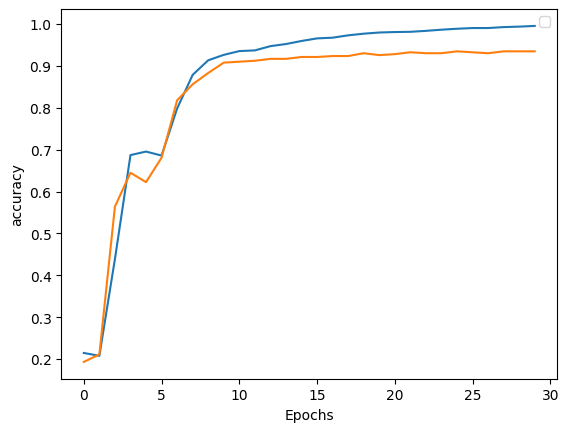

<ipython-input-56-b028d2a64d29>:7: UserWarning: The label '_' of 's' starts with '_'. It is thus excluded from the legend.
  plt.legend(string , 'val_' +string)


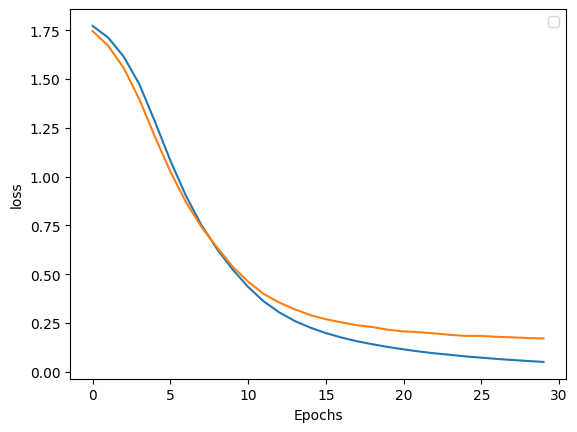

In [56]:
import matplotlib.pyplot as plt
def plot_graphs(history , string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend(string , 'val_' +string)
  plt.show()

plot_graphs(history , 'accuracy')
plot_graphs(history , 'loss')
# اول جراف طلعوا الاتنين قريبين من بعض معني كده ان مافيش overfitting يعني المودل متشبعش من الداتا معني كده ان الموديل reusable اقدر استخدمه و اعمل بيه classification صح